In [1]:
import torch
import importlib

from jupyter_client.blocking.client import wrapped

import wrapped.Dataloader as Dataloader
importlib.reload(Dataloader)

from wrapped.Dataloader import prep_data_precomputed

In [2]:
file_path = './Ckpts/Sen2MTC_FULL_3v1_norm.pt'
batch_size = 16

train_loader, val_loader, test_loader = prep_data_precomputed(file_path, batch_size)

Not running in Colab, switching to local data prep instead...
Pre-computed Dataloaders loaded successfully.


In [3]:
from wrapped.utils import inspect_one
for batch in train_loader:
    print(batch['cloudy_seq'].shape)
    print(batch['clean'].shape)
    x = batch['cloudy_seq'][0]
    print(x.mean(), x.std())
    break

torch.Size([16, 3, 4, 128, 128])
torch.Size([16, 4, 128, 128])
tensor(0.2180) tensor(0.7445)


In [1]:
import wrapped.get_pretrained as get_pretrained
importlib.reload(get_pretrained)
from wrapped.get_pretrained import get_pretrained_small, get_pretrained_large


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cloud_enc_pth = './Ckpts/cloud_enc_200e_FullData.pth'
denoiser_pth = './Ckpts/denoiser_200e_FullData.pth'
cloud_encoder, forwarder, denoiser = get_pretrained_large(device=device,
                                                          cloud_enc_pth=cloud_enc_pth,
                                                          denoiser_pth=denoiser_pth)

KeyboardInterrupt: 

In [5]:
from wrapped.model import backward_sampler

cloud_encoder.eval()
denoiser.eval()
batch = next(iter(test_loader))
cloudy_seq = batch['cloudy_seq'].to(device)

x0 = backward_sampler(cloudy_seq=cloudy_seq,
                      cloud_encoder=cloud_encoder,
                      denoiser=denoiser,
                      forwarder=forwarder,
                      num_steps=750)

KeyboardInterrupt: 

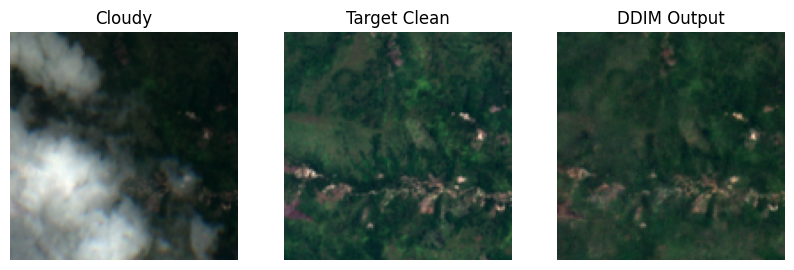

In [35]:
from wrapped.utils import visualize
visualize(cloudy_seq=cloudy_seq,
          batch=batch,
          x0=x0)

In [65]:
import wrapped.evaluation as evaluation
importlib.reload(evaluation)
from wrapped.evaluation import evaluate_over_loader

In [66]:
import lpips
lpips_model = lpips.LPIPS(net='vgg').to(device)
lpips_model.eval()

all_metrics, summary = evaluate_over_loader(
    test_loader=test_loader,
    cloud_encoder=cloud_encoder,
    denoiser=denoiser,
    forwarder=forwarder,
    num_steps=750,
    max_val=1.0,
    lpips_model=lpips_model,
    device=device,
)

print("Per-batch metrics example:", all_metrics[0])
print("Dataset summary:", summary)



Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


D:\PyCharm 2024.2.1\Projects\pythonProject\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\PyCharm 2024.2.1\Projects\pythonProject\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Rayh/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [00:10<00:00, 50.5MB/s] 


Loading model from: D:\PyCharm 2024.2.1\Projects\pythonProject\.venv\Lib\site-packages\lpips\weights\v0.1\vgg.pth


  0%|          | 0/129 [01:18<?, ?it/s]

Per-batch metrics example: {'MAE': 0.01858096569776535, 'PSNR': 23.28512954711914, 'SSIM': 0.8724199533462524, 'LPIPS': 0.14239773154258728}
Dataset summary: {'MAE_mean': 0.01858096569776535, 'MAE_std': nan, 'PSNR_mean': 23.28512954711914, 'PSNR_std': nan, 'SSIM_mean': 0.8724199533462524, 'SSIM_std': nan, 'LPIPS_mean': 0.14239773154258728, 'LPIPS_std': nan}



D:\PyCharm 2024.2.1\Projects\COMPSCI-372-DUKE\Final Project\wrapped\evaluation.py:160: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\ReduceOps.cpp:1831.)
  all_metrics.append(m)
